In [ ]:
##### Example: Plot country-level population experiencing cooling.

##### This script uses a minimal GeoDataFrame containing only:
##### - iso_a3
##### - Cooling_population
##### - geometry


##### Note on CESM2 simulations:

##### If you are interested in running or analyzing CESM2 simulations, please refer to
##### the official CESM2 documentation:
##### https://www.cesm.ucar.edu/models/cesm2

##### Due to the large data volume of CESM2 simulation outputs, this repository does
##### not provide raw CESM2 model outputs. Instead, we focus on the post-processed
##### statistical analysis of cooling population (cool_pop), which is more suitable
##### for demonstration, visualization, and reproducibility purposes.



In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from matplotlib.colors import LogNorm

In [2]:
# ==================================================
# 1. Load data
# ==================================================

gdf = gpd.read_file(
    "data/cooling_population_country.gpkg",
    layer="cooling_pop"
)

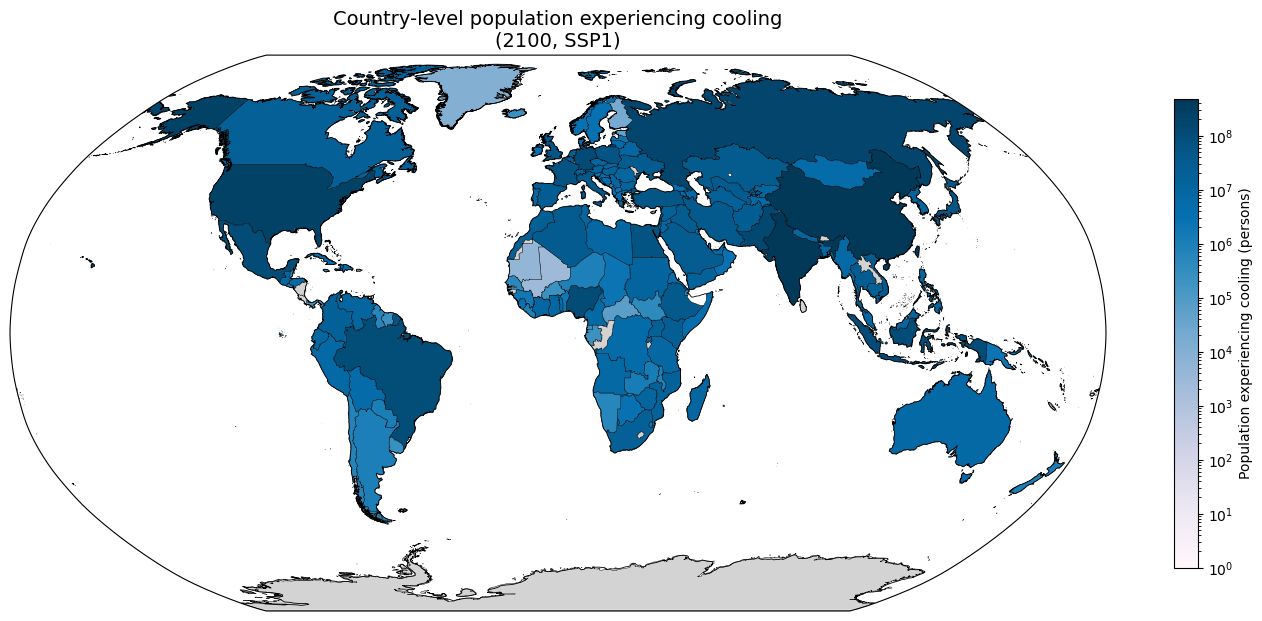

In [4]:
# ==================================================
# 2. Plot
# ==================================================

fig = plt.figure(figsize=(14, 7))
ax = plt.axes(projection=ccrs.Robinson())

gdf.plot(
    column="Cooling_population",
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap="PuBu",
    norm=LogNorm(
        vmin=1,
        vmax=np.nanpercentile(gdf["Cooling_population"], 99)
    ),
    missing_kwds={
        "color": "lightgrey",
        "label": "No cooling or no data"
    },
    edgecolor="black",
    linewidth=0.3,
    legend=True,
    legend_kwds={
        "label": "Population experiencing cooling (persons)",
        "shrink": 0.7
    }
)

ax.coastlines(linewidth=0.6)
ax.set_global()
ax.set_title(
    "Country-level population experiencing cooling\n"
    "(2100, SSP1)",
    fontsize=14
)

plt.tight_layout()
plt.show()